In [37]:
#imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as st
import quandl
from quandl_apitoken import api_key

In [38]:
try:
    copper_download = quandl.get("CHRIS/CME_HG2", authtoken=api_key)
    gold_download = quandl.get("CHRIS/CME_GC2", authtoken=api_key)
    SP500_download = quandl.get("CHRIS/CME_ES2", authtoken=api_key)
    
    copper_download.to_csv("copper_2nd.csv")
    gold_download.to_csv("gold_2nd.csv")
    SP500_download.to_csv("SP500_2nd.csv")
    

except Exception as e:
    print(e)

In [39]:
csv_file = os.path.join("copper_2nd.csv")
copper_raw_df = pd.read_csv(csv_file)
copper_raw_df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1959-10-29,0.3240,0.3240,0.3190,0.3240,NaN,0.3240,79.0,582.0
1,1959-10-30,0.3215,0.3278,0.3210,0.3215,NaN,0.3215,100.0,592.0
2,1959-11-02,0.3230,0.3230,0.3180,0.3230,NaN,0.3230,88.0,587.0
3,1959-11-04,0.3300,0.3307,0.3259,0.3300,NaN,0.3300,135.0,577.0
4,1959-11-05,0.3310,0.3340,0.3310,0.3310,NaN,0.3310,161.0,617.0


In [40]:
SP500 = 'SP500_2nd.csv'
SP500_df= pd.read_csv(SP500)
SP500_df.tail()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5783,2020-06-01,3020.00,3048.25,2998.5,3043.25,11.75,3043.50,10676.0,43905.0
5784,2020-06-02,3043.50,3067.25,3024.5,3066.25,22.00,3065.50,20121.0,50022.0
5785,2020-06-03,3067.00,3118.00,3063.0,3106.25,41.00,3106.50,23328.0,54240.0
5786,2020-06-04,3106.75,3115.75,3077.0,3103.00,6.75,3099.75,31864.0,57382.0
5787,2020-06-05,3102.25,3199.75,3096.0,3175.00,76.75,3176.50,56532.0,66325.0


In [41]:
SP500_df = SP500_df.sort_index(axis=0, ascending=False)
SP500_df.head()


,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5787,2020-06-05,3102.25,3199.75,3096.0,3175.00,76.75,3176.50,56532.0,66325.0
5786,2020-06-04,3106.75,3115.75,3077.0,3103.00,6.75,3099.75,31864.0,57382.0
5785,2020-06-03,3067.00,3118.00,3063.0,3106.25,41.00,3106.50,23328.0,54240.0
5784,2020-06-02,3043.50,3067.25,3024.5,3066.25,22.00,3065.50,20121.0,50022.0
5783,2020-06-01,3020.00,3048.25,2998.5,3043.25,11.75,3043.50,10676.0,43905.0


In [42]:
sp500_percent_return = []
previous_price = 117.45
for index , row in SP500_df.iterrows():
    Settle_row = row["Settle"]
    dailySP500_return = (Settle_row - previous_price) / previous_price *100
    sp500_percent_return.append(round(dailySP500_return, 2))
    previous_price = Settle_row
SP500_df.insert(1,"SP Daily Pct Return", sp500_percent_return)
SP500_df.tail()


,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
4,1997-09-15,-2.56,933.50,939.75,929.00,931.50,NaN,931.50,11749.0,3818.0
3,1997-09-12,0.24,918.00,936.50,913.50,933.75,NaN,933.75,18496.0,4059.0
2,1997-09-11,-1.66,924.00,929.75,910.25,918.25,NaN,918.25,9759.0,2909.0
1,1997-09-10,0.74,942.75,943.25,917.00,925.00,NaN,925.00,12261.0,382.0
0,1997-09-09,2.05,943.50,951.00,941.50,944.00,NaN,944.00,896.0,273.0


In [43]:
#SP500["Date"] = pd.to_datetime(SP500_df["Date"])

In [44]:
SP500_df["Date"] = pd.to_datetime(SP500_df["Date"])

In [45]:
SP87_df = SP500_df.loc[(SP500_df["Date"] >= "1987-01-02") & 
                                   (SP500_df["Date"] <= "1987-10-31")]
SP87_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest


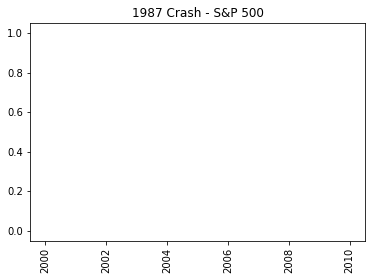

In [47]:
plt.plot(SP87_df['Date'],SP87_df['Settle'])
plt.title("1987 Crash - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [48]:
SPLTCM_df = SP500_df.loc[(SP500_df["Date"] >= "1997-10-01") & 
                                   (SP500_df["Date"] <= "1998-10-31")]
SPLTCM_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
292,1998-10-30,0.02,1105.00,1131.25,1105.00,1131.25,NaN,1131.25,130.0,200.0
291,1998-10-29,-2.32,1084.00,1105.25,1080.25,1105.00,NaN,1105.00,65.0,173.0
290,1998-10-28,-2.24,1079.00,1088.00,1075.00,1080.25,NaN,1080.25,17.0,140.0
289,1998-10-27,0.32,1098.00,1101.75,1078.75,1083.75,NaN,1083.75,59.0,132.0
288,1998-10-26,0.48,1083.00,1099.50,1083.00,1089.00,NaN,1089.00,45.0,143.0
...,...,...,...,...,...,...,...,...,...,...
20,1997-10-07,0.73,993.50,1001.00,991.50,1000.00,NaN,1000.00,1.0,23.0
19,1997-10-06,-1.10,989.25,995.00,989.00,989.00,NaN,989.00,21.0,22.0
18,1997-10-03,-0.30,996.00,996.00,976.75,986.00,NaN,986.00,6.0,22.0
17,1997-10-02,-0.66,970.75,980.00,970.75,979.50,NaN,979.50,20.0,14.0


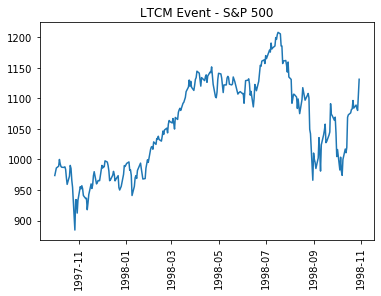

In [49]:
plt.plot(SPLTCM_df['Date'],SPLTCM_df['Settle'])
plt.title("LTCM Event - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [50]:
SPtech_df = SP500_df.loc[(SP500_df["Date"] >= "1999-01-02") & 
                                   (SP500_df["Date"] <= "2000-09-30")]
SPtech_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
780,2000-09-29,0.56,1486.00,1492.50,1483.50,1486.00,NaN,1486.00,1.0,5.0
779,2000-09-28,0.81,1498.00,1500.00,1498.75,1498.00,NaN,1498.00,0.0,6.0
778,2000-09-27,-1.97,1468.50,1475.50,1462.00,1468.50,NaN,1468.50,0.0,6.0
777,2000-09-26,-0.27,1464.50,1490.00,1464.50,1464.50,NaN,1464.50,2.0,6.0
776,2000-09-25,1.74,1490.00,1490.00,1490.00,1490.00,NaN,1490.00,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...
340,1999-01-08,1.25,1300.00,1301.00,1284.75,1296.00,NaN,1296.00,13.0,17.0
339,1999-01-07,-1.14,1291.25,1291.25,1280.25,1281.25,NaN,1281.25,8.0,17.0
338,1999-01-06,1.07,1270.00,1297.00,1270.00,1295.00,NaN,1295.00,10.0,16.0
337,1999-01-05,-2.24,1248.50,1267.50,1248.50,1266.00,NaN,1266.00,9.0,17.0


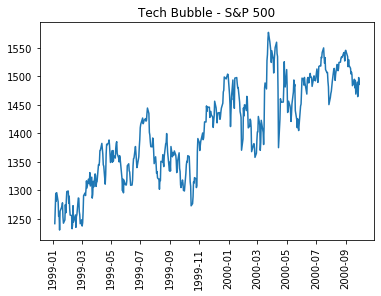

In [51]:
plt.plot(SPtech_df['Date'],SPtech_df['Settle'])
plt.title("Tech Bubble - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [52]:
SP911_df = SP500_df.loc[(SP500_df["Date"] >= "2000-01-02") & 
                                   (SP500_df["Date"] <= "2001-10-31")]
SP911_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
1053,2001-10-31,-1.96,1062.25,1062.25,1062.25,1062.25,NaN,1062.25,0.0,20.0
1052,2001-10-30,-0.16,1059.00,1060.50,1059.00,1060.50,NaN,1060.50,1.0,20.0
1051,2001-10-29,1.32,1091.00,1091.00,1074.50,1074.50,NaN,1074.50,2.0,19.0
1050,2001-10-26,2.75,1104.00,1105.50,1104.00,1104.00,NaN,1104.00,2.0,19.0
1049,2001-10-25,0.07,1071.00,1106.00,1071.00,1104.75,NaN,1104.75,3.0,19.0
...,...,...,...,...,...,...,...,...,...,...
596,2000-01-07,-2.06,1447.00,1463.00,1446.75,1463.00,NaN,1463.00,3.0,21.0
595,2000-01-06,-1.59,1419.25,1440.00,1418.00,1439.75,NaN,1439.75,24.0,20.0
594,2000-01-05,-1.93,1465.00,1435.00,1412.00,1412.00,NaN,1412.00,6.0,15.0
593,2000-01-04,2.69,1450.00,1450.00,1433.50,1450.00,NaN,1450.00,1.0,14.0


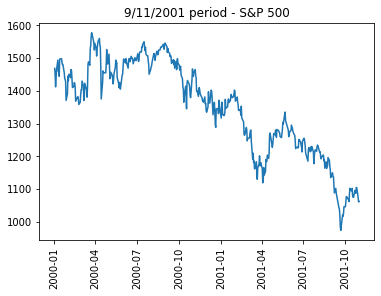

In [53]:
plt.plot(SP911_df['Date'],SP911_df['Settle'])
plt.title("9/11/2001 period - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [54]:
SPFC_df = SP500_df.loc[(SP500_df["Date"] >= "2007-01-02") & 
                                   (SP500_df["Date"] <= "2008-12-31")]
SPFC_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
2880,2008-12-31,-2.79,889.00,904.00,884.25,897.50,NaN,897.50,2958.0,7539.0
2879,2008-12-30,-1.34,870.25,885.75,868.00,885.50,NaN,885.50,471.0,7584.0
2878,2008-12-29,-1.98,864.75,870.00,851.00,868.00,NaN,868.00,426.0,7266.0
2877,2008-12-26,-0.17,866.50,866.75,862.50,866.50,NaN,866.50,53.0,7480.0
2876,2008-12-24,-0.46,859.50,862.50,856.00,862.50,NaN,862.50,19.0,7489.0
...,...,...,...,...,...,...,...,...,...,...
2367,2007-01-08,0.14,1430.50,1437.00,1425.50,1435.25,NaN,1435.25,594.0,14218.0
2366,2007-01-05,-0.44,1438.50,1438.50,1427.00,1429.00,NaN,1429.00,597.0,13716.0
2365,2007-01-04,0.77,1435.50,1443.50,1430.00,1440.00,NaN,1440.00,333.0,13222.0
2364,2007-01-03,-0.17,1450.25,1452.50,1430.50,1437.50,NaN,1437.50,596.0,13052.0


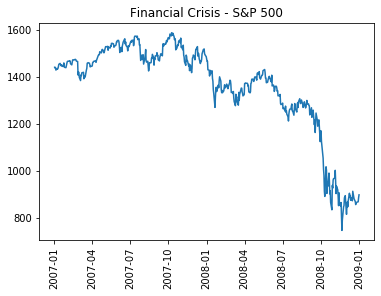

In [55]:
plt.plot(SPFC_df['Date'],SPFC_df['Settle'])
plt.title("Financial Crisis - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [56]:
SP500_Flash_df = SP500_df.loc[(SP500_df["Date"] >= "2010-02-01") & 
                                   (SP500_df["Date"] <= "2010-06-30")]

SP500_Flash_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
3266,2010-06-30,0.47,1030.00,1039.25,1018.50,1022.00,NaN,1022.00,2184.0,10591.0
3265,2010-06-29,0.88,1065.25,1068.75,1026.50,1031.00,NaN,1031.00,5277.0,9995.0
3264,2010-06-28,3.44,1071.75,1074.00,1062.75,1066.50,NaN,1066.50,657.0,6321.0
3263,2010-06-25,0.38,1066.50,1075.00,1059.75,1070.50,NaN,1070.50,1490.0,6322.0
3262,2010-06-24,-0.40,1082.25,1086.50,1063.00,1066.25,NaN,1066.25,1462.0,5962.0
...,...,...,...,...,...,...,...,...,...,...
3163,2010-02-05,0.36,1056.75,1060.25,1036.25,1055.00,NaN,1055.00,3104.0,17456.0
3162,2010-02-04,0.19,1090.75,1091.50,1054.75,1057.00,NaN,1057.00,1899.0,15969.0
3161,2010-02-03,3.12,1092.75,1095.00,1085.75,1090.00,NaN,1090.00,1019.0,15739.0
3160,2010-02-02,0.23,1081.25,1096.50,1078.25,1092.50,NaN,1092.50,2778.0,15752.0


In [57]:
SP500_debtc_df = SP500_df.loc[(SP500_df["Date"] >= "2011-09-01") & 
                                   (SP500_df["Date"] <= "2012-06-30")]

SP500_debtc_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
3784,2012-06-29,-0.04,1314.75,1352.50,1309.75,1350.75,NaN,1350.75,2433.0,14792.0
3783,2012-06-28,-2.61,1318.50,1321.00,1300.50,1315.50,NaN,1315.50,1762.0,15012.0
3782,2012-06-27,0.25,1308.00,1321.50,1306.25,1318.75,NaN,1318.75,976.0,14565.0
3781,2012-06-26,-0.89,1300.50,1311.00,1297.00,1307.00,NaN,1307.00,1712.0,14071.0
3780,2012-06-25,-0.61,1318.75,1318.75,1296.00,1299.00,NaN,1299.00,671.0,12816.0
...,...,...,...,...,...,...,...,...,...,...
3574,2011-09-07,1.12,1158.50,1194.00,1158.50,1193.25,NaN,1193.25,246217.0,351035.0
3573,2011-09-06,-2.89,1138.50,1160.00,1130.50,1158.75,NaN,1158.75,62357.0,167635.0
3572,2011-09-05,-1.62,1161.00,1161.00,1132.75,1140.00,NaN,1140.00,33677.0,132810.0
3571,2011-09-02,2.06,1195.00,1198.25,1163.00,1163.50,NaN,1163.50,33677.0,132833.0


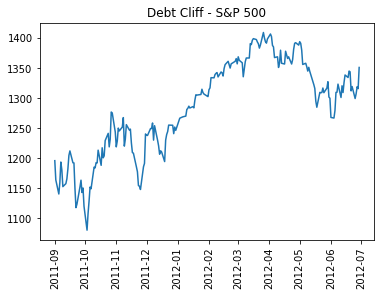

In [58]:
plt.plot(SP500_debtc_df['Date'],SP500_debtc_df['Settle'])
plt.title("Debt Cliff - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [59]:
SP500_Chinablack_df = SP500_df.loc[(SP500_df["Date"] >= "2015-01-02") & 
                                   (SP500_df["Date"] <= "2016-03-01")]

SP500_Chinablack_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
4712,2016-03-01,-0.28,1919.00,1969.25,1911.75,1968.50,48.50,1968.75,19566.0,122997.0
4711,2016-02-29,-2.46,1933.50,1947.00,1917.75,1919.25,13.25,1920.25,15110.0,114669.0
4710,2016-02-26,0.69,1939.25,1959.25,1932.50,1932.50,7.75,1933.50,11341.0,111313.0
4709,2016-02-25,0.40,1923.75,1941.75,1911.25,1940.75,20.25,1941.25,15564.0,102105.0
4708,2016-02-24,-1.04,1904.50,1924.25,1877.25,1924.25,13.75,1921.00,10140.0,98523.0
...,...,...,...,...,...,...,...,...,...,...
4425,2015-01-08,0.97,2014.50,2051.25,2013.50,2047.00,35.25,2047.75,2663.0,9774.0
4424,2015-01-07,-1.72,1989.50,2016.50,1989.50,2013.25,25.50,2012.50,1465.0,9661.0
4423,2015-01-06,-1.27,2011.50,2016.00,1977.50,1988.25,21.50,1987.00,2691.0,9120.0
4422,2015-01-05,1.08,2037.00,2041.25,2002.50,2010.50,30.50,2008.50,2388.0,8589.0


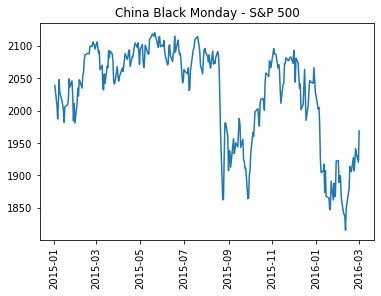

In [60]:
plt.plot(SP500_Chinablack_df['Date'],SP500_Chinablack_df['Settle'])
plt.title("China Black Monday - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [61]:
SP500_2018_df = SP500_df.loc[(SP500_df["Date"] >= "2017-01-02") & 
                                   (SP500_df["Date"] <= "2018-07-31")]

SP500_2018_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5321,2018-07-31,0.22,2808.50,2831.75,2807.25,2830.25,14.00,2821.25,1686.0,57110.0
5320,2018-07-30,-0.50,2820.25,2825.25,2802.50,2809.25,14.25,2807.25,1725.0,56842.0
5319,2018-07-27,0.51,2844.75,2851.25,2813.00,2821.75,25.00,2821.50,2050.0,56329.0
5318,2018-07-26,0.89,2843.00,2850.25,2837.50,2843.50,1.00,2846.50,2903.0,54240.0
5317,2018-07-25,-0.04,2821.50,2853.50,2818.25,2849.00,20.50,2845.50,4824.0,53465.0
...,...,...,...,...,...,...,...,...,...,...
4929,2017-01-09,0.07,2265.75,2269.25,2258.00,2258.50,6.50,2259.25,1074.0,17334.0
4928,2017-01-06,0.29,2258.25,2270.75,2252.75,2265.00,7.25,2265.75,1918.0,17296.0
4927,2017-01-05,-0.32,2259.00,2260.00,2248.50,2258.75,NaN,2258.50,6209.0,14014.0
4926,2017-01-04,0.00,2246.25,2261.00,2245.75,2258.50,11.50,2258.50,3076.0,12196.0


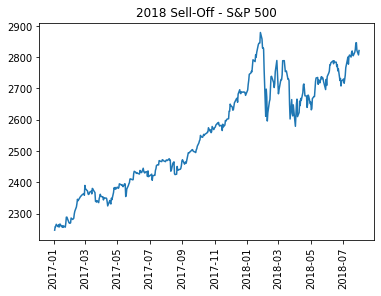

In [62]:
plt.plot(SP500_2018_df['Date'],SP500_2018_df['Settle'])
plt.title("2018 Sell-Off - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [63]:
SP500_Covid_df = SP500_df.loc[(SP500_df["Date"] >= "2019-01-02") & 
                                   (SP500_df["Date"] <= "2020-03-17")]

SP500_Covid_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5731,2020-03-17,3.50,2407.00,2542.75,2352.00,2474.75,80.25,2485.50,3731392.0,2156542.0
5730,2020-03-16,-3.23,2631.50,2652.00,2350.00,2399.50,278.75,2405.25,3473890.0,1426136.0
5729,2020-03-13,11.59,2417.00,2697.25,2380.00,2652.75,228.00,2684.00,3182675.0,689460.0
5728,2020-03-12,-8.49,2727.00,2762.00,2429.75,2437.25,273.00,2456.00,1411333.0,352905.0
5727,2020-03-11,11.12,2849.75,2858.00,2691.25,2730.00,125.25,2729.00,208346.0,299064.0
...,...,...,...,...,...,...,...,...,...,...
5432,2019-01-08,-0.42,2558.00,2585.75,2553.00,2575.00,22.00,2577.00,4462.0,29340.0
5431,2019-01-07,-0.85,2540.25,2571.25,2528.50,2558.00,19.50,2555.00,10379.0,27554.0
5430,2019-01-04,-0.76,2455.00,2542.75,2442.25,2534.25,84.50,2535.50,10889.0,25692.0
5429,2019-01-03,-3.33,2486.50,2496.50,2447.25,2455.00,63.75,2451.00,10346.0,22123.0


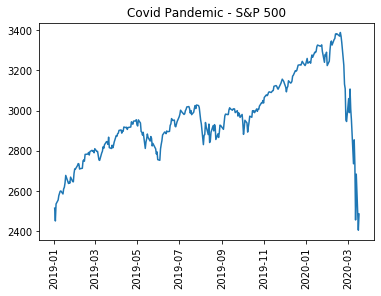

In [64]:
plt.plot(SP500_Covid_df['Date'],SP500_Covid_df['Settle'])
plt.title("Covid Pandemic - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [65]:
copper = 'copper_2nd.csv'
copper_df = pd.read_csv(copper)
print(copper_df.shape)


(9982, 9)


In [66]:
gold = 'gold_2nd.csv'
gold_df = pd.read_csv(gold)
print(copper_df.shape)


(9982, 9)


In [67]:
copp_gold_df = pd.merge(gold_df, copper_df, on=["Date"])
copp_gold_df.head()


,Date,Open_x,High_x,Low_x,Last_x,Change_x,Settle_x,Volume_x,Previous Day Open Interest_x,Open_y,High_y,Low_y,Last_y,Change_y,Settle_y,Volume_y,Previous Day Open Interest_y
0,1975-09-26,136.1,139.3,136.1,139.0,NaN,139.0,972.0,4713.0,0.573,0.581,0.573,0.580,NaN,0.580,51.0,2174.0
1,1975-09-29,138.2,141.3,138.2,139.8,NaN,139.8,1012.0,4626.0,0.578,0.578,0.575,0.575,NaN,0.575,78.0,2179.0
2,1975-09-30,141.5,143.9,141.5,142.2,NaN,142.2,947.0,4556.0,0.572,0.579,0.571,0.571,NaN,0.571,35.0,2169.0
3,1975-10-01,145.0,145.8,143.6,144.2,NaN,144.2,1153.0,4510.0,0.575,0.575,0.571,0.572,NaN,0.572,99.0,2151.0
4,1975-10-02,145.0,146.2,142.5,143.4,NaN,143.4,1159.0,4254.0,0.570,0.570,0.567,0.568,NaN,0.568,20.0,2144.0


In [68]:
copp_gold_df = pd.DataFrame({
    "Date": copp_gold_df["Date"],
    "Gold Price": copp_gold_df["Settle_x"],
    "Copper Price": copp_gold_df["Settle_y"]
})
copp_gold_df

,Date,Gold Price,Copper Price
0,1975-09-26,139.0,0.5800
1,1975-09-29,139.8,0.5750
2,1975-09-30,142.2,0.5710
3,1975-10-01,144.2,0.5720
4,1975-10-02,143.4,0.5680
...,...,...,...
8675,2020-06-01,1750.3,2.4705
8676,2020-06-02,1734.0,2.4910
8677,2020-06-03,1704.8,2.4875
8678,2020-06-04,1727.4,2.4895


In [69]:
copp_gold_df_corr = st.pearsonr(copp_gold_df["Gold Price"],copp_gold_df["Copper Price"])[0]
print(copp_gold_df_corr)

0.8656565209822888


In [70]:
gold_copp_ratio = (copp_gold_df["Copper Price"] / copp_gold_df["Gold Price"])

In [71]:
copp_gold_df.insert(3,"GoldCopperRatio", gold_copp_ratio)
copp_gold_df.head()                                       


,Date,Gold Price,Copper Price,GoldCopperRatio
0,1975-09-26,139.0,0.580,0.004173
1,1975-09-29,139.8,0.575,0.004113
2,1975-09-30,142.2,0.571,0.004015
3,1975-10-01,144.2,0.572,0.003967
4,1975-10-02,143.4,0.568,0.003961


In [72]:
copp_gold_df = copp_gold_df.sort_index(axis=0, ascending=False)
copp_gold_df.head()


,Date,Gold Price,Copper Price,GoldCopperRatio
8679,2020-06-05,1683.0,2.5555,0.001518
8678,2020-06-04,1727.4,2.4895,0.001441
8677,2020-06-03,1704.8,2.4875,0.001459
8676,2020-06-02,1734.0,2.4910,0.001437
8675,2020-06-01,1750.3,2.4705,0.001411


In [73]:
copp_gold_percent_chg = []
previous_price = .002849
for index , row in copp_gold_df.iterrows():
    GcR_row = row["GoldCopperRatio"]
    GcR_daily_pctchg = (GcR_row - previous_price) / previous_price *100
    copp_gold_percent_chg.append(round(GcR_daily_pctchg, 2))
    previous_price = GcR_row
copp_gold_df.insert(1,"Gold-Copp Dly Ret", copp_gold_percent_chg)
copp_gold_df.head()



,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8679,2020-06-05,-46.70,1683.0,2.5555,0.001518
8678,2020-06-04,-5.09,1727.4,2.4895,0.001441
8677,2020-06-03,1.24,1704.8,2.4875,0.001459
8676,2020-06-02,-1.55,1734.0,2.4910,0.001437
8675,2020-06-01,-1.75,1750.3,2.4705,0.001411


In [74]:
copp_gold_df["Date"] = pd.to_datetime(copp_gold_df["Date"])

In [75]:
copp_gold_years_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1980-12-31") & 
                                   (copp_gold_df["Date"] <= "2020-01-02")]

copp_gold_years_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8572,2020-01-02,2.94,1531.4,2.8280,0.001847
8571,2019-12-31,-0.81,1526.5,2.7960,0.001832
8570,2019-12-27,1.61,1518.1,2.8255,0.001861
8569,2019-12-26,0.99,1514.4,2.8465,0.001880
8568,2019-12-24,-0.12,1504.8,2.8250,0.001877
...,...,...,...,...,...
376,1981-10-02,-0.32,447.5,0.7855,0.001755
375,1981-10-01,1.77,440.0,0.7860,0.001786
374,1981-09-30,-1.69,443.0,0.7780,0.001756
373,1981-09-29,0.15,441.5,0.7765,0.001759


In [76]:
copp_gold_87_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1987-01-01") & 
                                   (copp_gold_df["Date"] <= "1987-10-31")]

copp_gold_87_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
774,1987-10-30,-4.09,477.2,0.8100,0.001697
773,1987-10-29,-2.43,474.6,0.7860,0.001656
772,1987-10-28,0.59,480.5,0.8005,0.001666
771,1987-10-27,-0.59,478.8,0.7930,0.001656
770,1987-10-26,-1.51,479.4,0.7820,0.001631
769,1987-10-23,3.91,476.7,0.8080,0.001695
768,1987-10-22,-1.19,473.2,0.7925,0.001675
767,1987-10-21,-2.02,471.7,0.7740,0.001641
766,1987-10-20,-3.40,467.5,0.7410,0.001585
765,1987-10-19,8.74,486.8,0.8390,0.001724


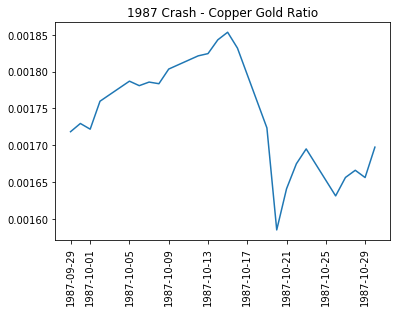

In [77]:
plt.plot(copp_gold_87_df['Date'],copp_gold_87_df['GoldCopperRatio'])
plt.title("1987 Crash - Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [78]:
copp_gold_ltcm_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1997-10-01") & 
                                   (copp_gold_df["Date"] <= "1998-10-31")]

copp_gold_ltcm_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
3308,1998-10-30,-1.46,295.7,0.7240,0.002448
3307,1998-10-29,-1.68,296.8,0.7145,0.002407
3306,1998-10-28,-0.53,294.4,0.7050,0.002395
3305,1998-10-27,0.64,294.8,0.7105,0.002410
3304,1998-10-26,1.26,293.6,0.7165,0.002440
...,...,...,...,...,...
3040,1997-10-07,1.30,333.3,0.9440,0.002832
3039,1997-10-06,-0.97,334.6,0.9385,0.002805
3038,1997-10-03,-1.26,336.9,0.9330,0.002769
3037,1997-10-02,0.97,333.5,0.9325,0.002796


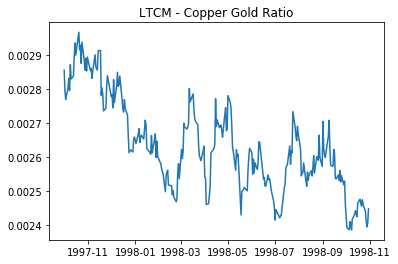

In [79]:
plt.plot(copp_gold_ltcm_df['Date'],copp_gold_ltcm_df['GoldCopperRatio'])
plt.title("LTCM - Copper Gold Ratio")
plt.show()

In [80]:
copp_gold_tech_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1999-01-02") & 
                                   (copp_gold_df["Date"] <= "2000-09-30")]

copp_gold_tech_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
3786,2000-09-29,2.12,276.9,0.9180,0.003315
3785,2000-09-28,-0.99,278.9,0.9155,0.003283
3784,2000-09-27,-1.12,281.6,0.9140,0.003246
3783,2000-09-26,1.94,277.3,0.9175,0.003309
3782,2000-09-25,1.14,277.3,0.9280,0.003347
...,...,...,...,...,...
3354,1999-01-08,-1.41,294.1,0.6550,0.002227
3353,1999-01-07,-1.13,294.5,0.6485,0.002202
3352,1999-01-06,1.42,290.6,0.6490,0.002233
3351,1999-01-05,-0.73,289.8,0.6425,0.002217


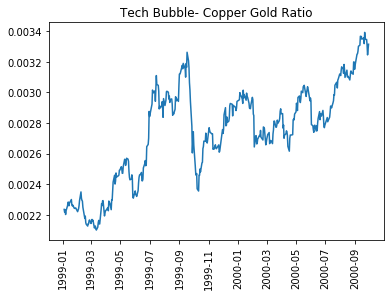

In [81]:
plt.plot(copp_gold_tech_df['Date'],copp_gold_tech_df['GoldCopperRatio'])
plt.title("Tech Bubble- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [82]:
copp_gold_911_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2000-01-02") & 
                                   (copp_gold_df["Date"] <= "2001-10-31")]

copp_gold_911_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
4057,2001-10-31,0.80,281.1,0.6250,0.002223
4056,2001-10-30,1.78,281.7,0.6375,0.002263
4055,2001-10-29,-0.71,279.7,0.6285,0.002247
4054,2001-10-26,1.06,278.3,0.6320,0.002271
4053,2001-10-25,-1.39,278.2,0.6230,0.002239
...,...,...,...,...,...
3604,2000-01-10,0.99,284.7,0.8420,0.002957
3603,2000-01-07,0.82,284.9,0.8495,0.002982
3602,2000-01-06,-0.00,284.4,0.8480,0.002982
3601,2000-01-05,0.58,284.1,0.8520,0.002999


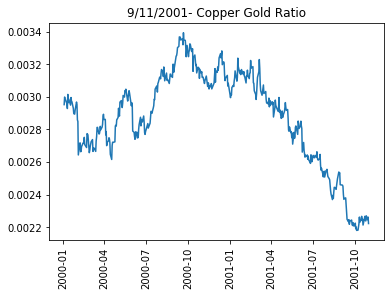

In [83]:
plt.plot(copp_gold_911_df['Date'],copp_gold_911_df['GoldCopperRatio'])
plt.title("9/11/2001- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [84]:
copp_gold_FC_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2007-01-02") & 
                                   (copp_gold_df["Date"] <= "2008-12-31")]

copp_gold_FC_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
5845,2008-12-31,-4.00,885.3,1.4030,0.001585
5844,2008-12-30,-4.79,870.9,1.3140,0.001509
5843,2008-12-29,-1.64,875.3,1.2990,0.001484
5842,2008-12-26,-0.42,871.2,1.2875,0.001478
5841,2008-12-24,0.50,848.0,1.2595,0.001485
...,...,...,...,...,...
5349,2007-01-09,-4.36,621.0,2.5520,0.004110
5348,2007-01-08,-0.18,615.4,2.5245,0.004102
5347,2007-01-05,0.73,612.9,2.5325,0.004132
5346,2007-01-04,-0.52,632.3,2.5990,0.004110


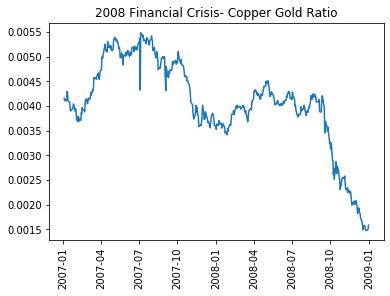

In [85]:
plt.plot(copp_gold_FC_df['Date'],copp_gold_FC_df['GoldCopperRatio'])
plt.title("2008 Financial Crisis- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [86]:
copp_gold_flash_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2010-02-01") & 
                                   (copp_gold_df["Date"] <= "2010-06-30")]

copp_gold_flash_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
6217,2010-06-30,-0.70,1247.9,2.9440,0.002359
6216,2010-06-29,-0.43,1244.4,2.9230,0.002349
6215,2010-06-28,5.57,1238.6,3.0715,0.002480
6214,2010-06-25,-0.63,1256.2,3.0955,0.002464
6213,2010-06-24,-2.10,1245.9,3.0055,0.002412
...,...,...,...,...,...
6118,2010-02-05,-0.66,1052.8,2.8575,0.002714
6117,2010-02-04,-0.21,1063.0,2.8790,0.002708
6116,2010-02-03,-1.27,1112.0,2.9735,0.002674
6115,2010-02-02,3.34,1118.0,3.0895,0.002763


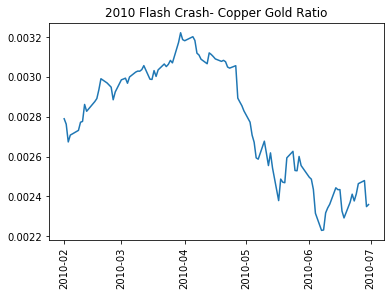

In [87]:
plt.plot(copp_gold_flash_df['Date'],copp_gold_flash_df['GoldCopperRatio'])
plt.title("2010 Flash Crash- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [88]:
copp_gold_debt_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2011-09-01") & 
                                   (copp_gold_df["Date"] <= "2012-06-30")]

copp_gold_debt_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
6687,2012-06-29,0.37,1606.4,3.4940,0.002175
6686,2012-06-28,-1.38,1552.5,3.3300,0.002145
6685,2012-06-27,-1.06,1578.4,3.3495,0.002122
6684,2012-06-26,-0.87,1574.9,3.3130,0.002104
6683,2012-06-25,-0.76,1588.4,3.3160,0.002088
...,...,...,...,...,...
6507,2011-10-07,-0.76,1635.8,3.2685,0.001998
6506,2011-10-06,-1.85,1653.2,3.2420,0.001961
6505,2011-10-05,-3.67,1641.6,3.1010,0.001889
6504,2011-10-04,1.52,1616.0,3.0990,0.001918


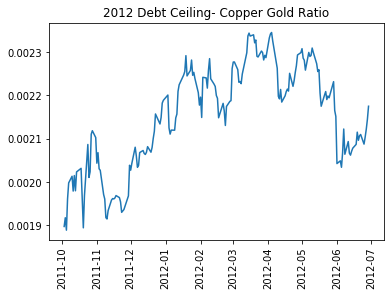

In [89]:
plt.plot(copp_gold_debt_df['Date'],copp_gold_debt_df['GoldCopperRatio'])
plt.title("2012 Debt Ceiling- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [90]:
copp_gold_china_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2015-01-02") & 
                                   (copp_gold_df["Date"] <= "2016-03-01")]

copp_gold_china_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
7606,2016-03-01,-0.77,1230.8,2.1425,0.001741
7605,2016-02-29,-0.87,1234.4,2.1300,0.001726
7604,2016-02-26,0.74,1220.4,2.1215,0.001738
7603,2016-02-25,-4.04,1238.8,2.0665,0.001668
7602,2016-02-24,1.44,1238.7,2.0960,0.001692
...,...,...,...,...,...
7320,2015-01-08,1.23,1208.8,2.7950,0.002312
7319,2015-01-07,-0.61,1211.0,2.7830,0.002298
7318,2015-01-06,-0.59,1219.7,2.7865,0.002285
7317,2015-01-05,1.07,1204.4,2.7810,0.002309


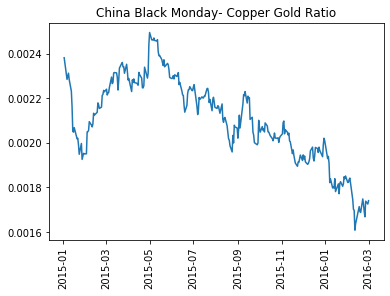

In [91]:
plt.plot(copp_gold_china_df['Date'],copp_gold_china_df['GoldCopperRatio'])
plt.title("China Black Monday- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [92]:
copp_gold_2018_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2017-01-02") & 
                                   (copp_gold_df["Date"] <= "2018-07-31")]

copp_gold_2018_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8214,2018-07-31,2.55,1228.5,2.8315,0.002305
8213,2018-07-30,-1.23,1226.4,2.7920,0.002277
8212,2018-07-27,-0.20,1227.8,2.7895,0.002272
8211,2018-07-26,0.42,1230.5,2.8075,0.002282
8210,2018-07-25,-0.42,1236.4,2.8090,0.002272
...,...,...,...,...,...
7823,2017-01-09,-2.79,1186.3,2.5350,0.002137
7822,2017-01-06,1.28,1174.8,2.5425,0.002164
7821,2017-01-05,-1.01,1182.6,2.5335,0.002142
7820,2017-01-04,2.14,1166.5,2.5525,0.002188


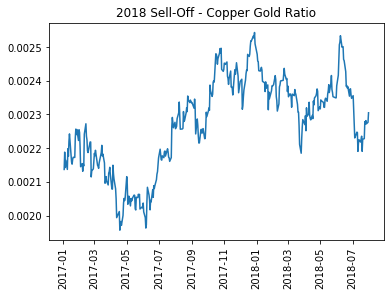

In [93]:
plt.plot(copp_gold_2018_df['Date'],copp_gold_2018_df['GoldCopperRatio'])
plt.title("2018 Sell-Off - Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [94]:
copp_gold_covid_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2019-01-02") & 
                                   (copp_gold_df["Date"] <= "2020-03-17")]

copp_gold_covid_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8623,2020-03-17,4.10,1525.8,2.3155,0.001518
8622,2020-03-16,6.15,1486.5,2.3945,0.001611
8621,2020-03-13,0.91,1516.7,2.4655,0.001626
8620,2020-03-12,-4.28,1590.3,2.4745,0.001556
8619,2020-03-11,-1.95,1642.3,2.5055,0.001526
...,...,...,...,...,...
8325,2019-01-08,0.42,1289.3,2.6555,0.002060
8324,2019-01-07,-0.99,1293.3,2.6375,0.002039
8323,2019-01-04,0.74,1289.2,2.6485,0.002054
8322,2019-01-03,-3.69,1298.4,2.5690,0.001979


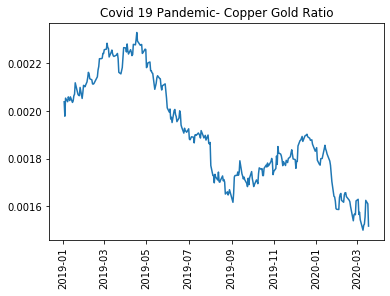

In [95]:
plt.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['GoldCopperRatio'])
plt.title("Covid 19 Pandemic- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [96]:
copp_gold__SP_df = pd.merge(copp_gold_df, SP500_df, on=["Date"])

copp_gold__SP_df.head()


,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,2020-06-05,-46.70,1683.0,2.5555,0.001518,2604.56,3102.25,3199.75,3096.0,3175.00,76.75,3176.50,56532.0,66325.0
1,2020-06-04,-5.09,1727.4,2.4895,0.001441,-2.42,3106.75,3115.75,3077.0,3103.00,6.75,3099.75,31864.0,57382.0
2,2020-06-03,1.24,1704.8,2.4875,0.001459,0.22,3067.00,3118.00,3063.0,3106.25,41.00,3106.50,23328.0,54240.0
3,2020-06-02,-1.55,1734.0,2.4910,0.001437,-1.32,3043.50,3067.25,3024.5,3066.25,22.00,3065.50,20121.0,50022.0
4,2020-06-01,-1.75,1750.3,2.4705,0.001411,-0.72,3020.00,3048.25,2998.5,3043.25,11.75,3043.50,10676.0,43905.0


In [97]:
copp_gold__SP_df["Date"] = pd.to_datetime(copp_gold__SP_df["Date"])

In [98]:
copp_gold__SP_df.tail()

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5654,1997-09-15,0.32,324.7,0.9460,0.002913,-2.56,933.50,939.75,929.00,931.50,NaN,931.50,11749.0,3818.0
5655,1997-09-12,-0.67,326.2,0.9440,0.002894,0.24,918.00,936.50,913.50,933.75,NaN,933.75,18496.0,4059.0
5656,1997-09-11,-0.44,326.6,0.9410,0.002881,-1.66,924.00,929.75,910.25,918.25,NaN,918.25,9759.0,2909.0
5657,1997-09-10,3.72,324.1,0.9685,0.002988,0.74,942.75,943.25,917.00,925.00,NaN,925.00,12261.0,382.0
5658,1997-09-09,-0.31,324.1,0.9655,0.002979,2.05,943.50,951.00,941.50,944.00,NaN,944.00,896.0,273.0


In [99]:
copp_gold10_df = copp_gold__SP_df.iloc[1:11, 0:2]

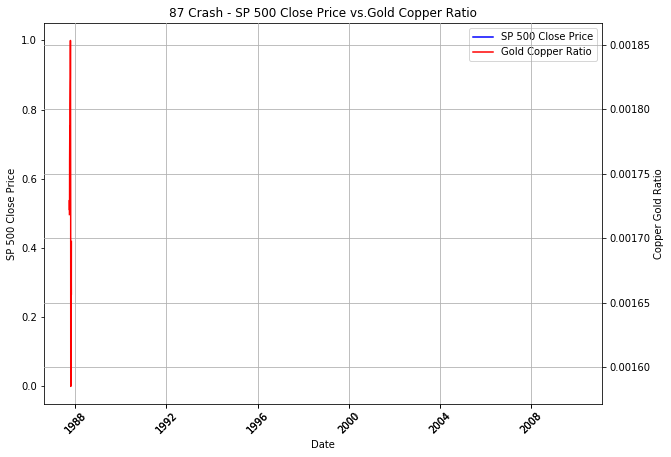

In [100]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP87_df['Date'], SP87_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_87_df['Date'],copp_gold_87_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("87 Crash - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [101]:
CGr_SP_87_df = pd.merge(copp_gold_87_df, SP87_df, on=["Date"])
CGr_SP_87_corr = st.pearsonr(CGr_SP_87_df["GoldCopperRatio"],CGr_SP_87_df["Settle"])[0]
print(CGr_SP_87_corr)

ValueError: x and y must have length at least 2.

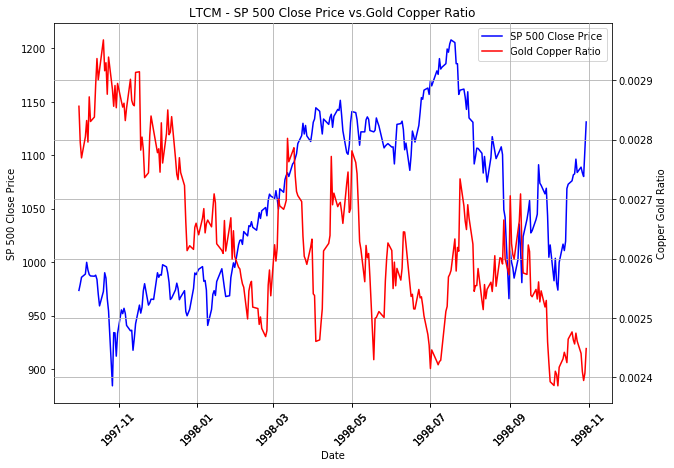

In [102]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPLTCM_df['Date'], SPLTCM_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_ltcm_df['Date'],copp_gold_ltcm_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("LTCM - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

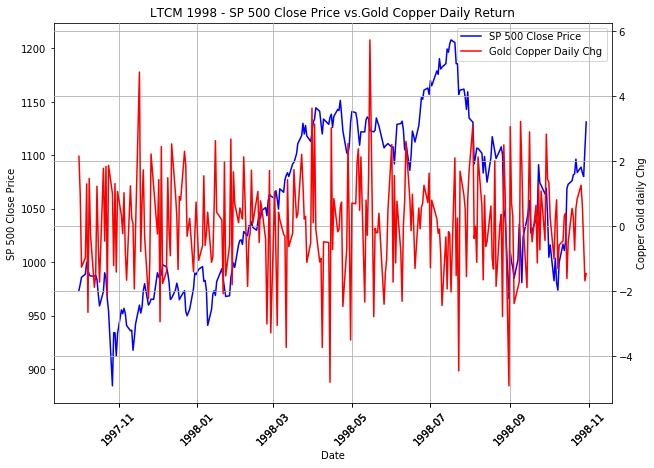

In [103]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPLTCM_df['Date'], SPLTCM_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_ltcm_df['Date'],copp_gold_ltcm_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("LTCM 1998 - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [104]:
CGr_SP_LTCM_df = pd.merge(copp_gold_ltcm_df, SPLTCM_df, on=["Date"])
CGr_SP_LTCM_corr = st.pearsonr(CGr_SP_LTCM_df["GoldCopperRatio"],CGr_SP_LTCM_df["Settle"])[0]
print(CGr_SP_LTCM_corr)

-0.5182976190343422


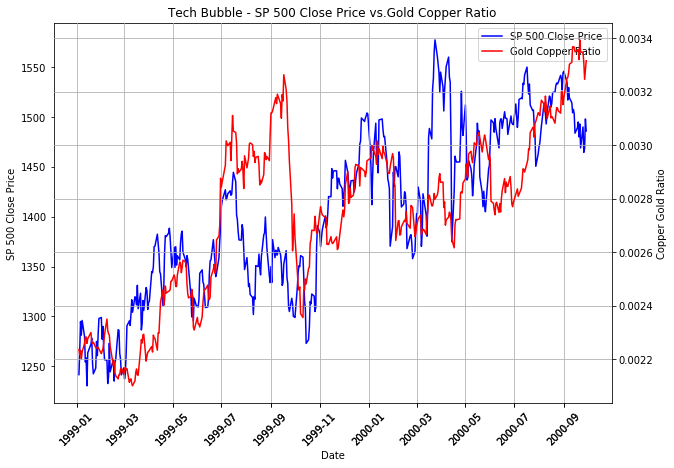

In [105]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPtech_df['Date'], SPtech_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_tech_df['Date'],copp_gold_tech_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("Tech Bubble - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

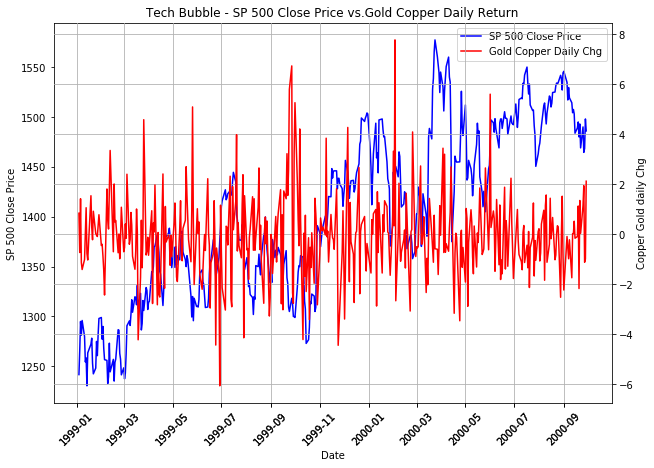

In [106]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPtech_df['Date'], SPtech_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_tech_df['Date'],copp_gold_tech_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("Tech Bubble - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [107]:
CGr_SP_tech_df = pd.merge(copp_gold_tech_df, SPtech_df, on=["Date"])
CGr_SP_tech_corr = st.pearsonr(CGr_SP_tech_df["GoldCopperRatio"],CGr_SP_tech_df["Settle"])[0]
print(CGr_SP_tech_corr)

0.7004921036625438


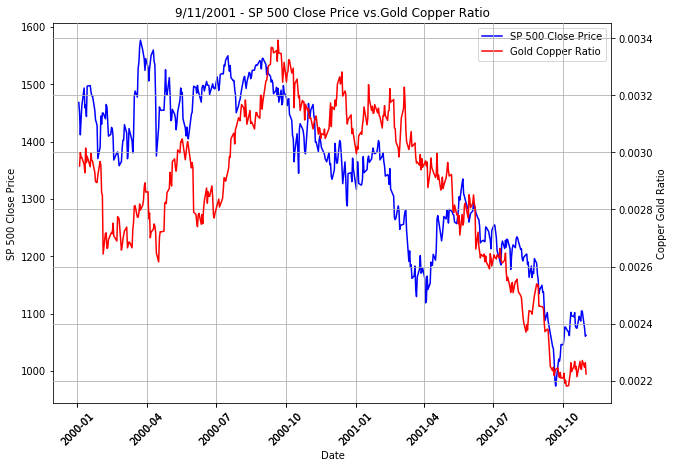

In [108]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP911_df['Date'], SP911_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_911_df['Date'],copp_gold_911_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("9/11/2001 - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

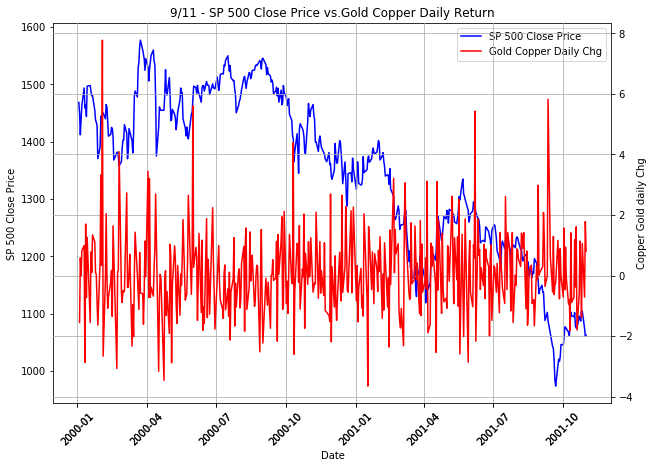

In [109]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP911_df['Date'], SP911_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_911_df['Date'],copp_gold_911_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("9/11 - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [110]:
CGr_SP_911 = pd.merge(copp_gold_911_df, SP911_df )
CGr_SP_911_corr = st.pearsonr(CGr_SP_911_df["GoldCopperRatio"],CGr_SP_911_df["Settle"])[0]
print(CGr_SP_911_corr)

NameError: name 'CGr_SP_911_df' is not defined

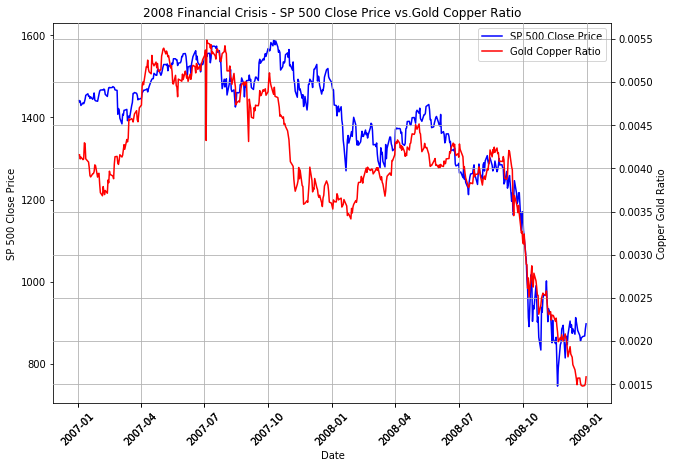

In [111]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPFC_df['Date'], SPFC_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_FC_df['Date'],copp_gold_FC_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("2008 Financial Crisis - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

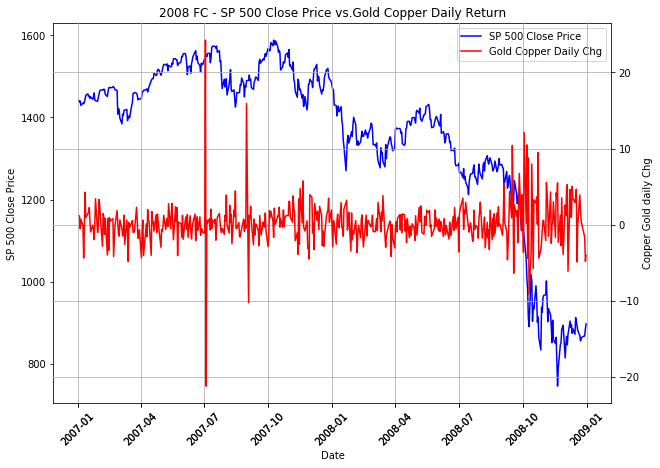

In [112]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPFC_df['Date'], SPFC_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_FC_df['Date'],copp_gold_FC_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("2008 FC - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [113]:
CGr_SP_FC_df = pd.merge(copp_gold_FC_df, SPFC_df, on=["Date"])
CGr_SP_FC_corr = st.pearsonr(CGr_SP_FC_df["GoldCopperRatio"],CGr_SP_FC_df["Settle"])[0]
print(CGr_SP_FC_corr)

0.8796487015446087


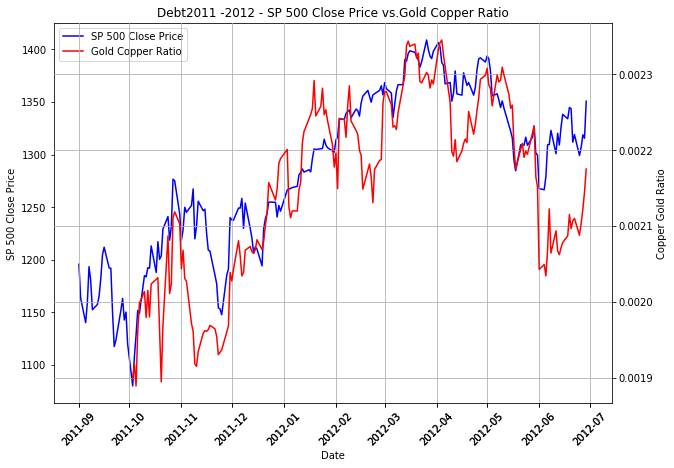

In [114]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_debtc_df['Date'], SP500_debtc_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_debt_df['Date'],copp_gold_debt_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("Debt2011 -2012 - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

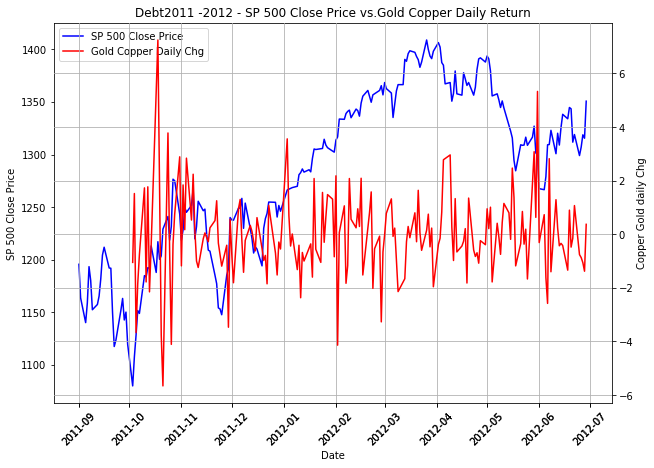

In [115]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_debtc_df['Date'], SP500_debtc_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_debt_df['Date'],copp_gold_debt_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("Debt2011 -2012 - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [116]:
CGr_SP_2011_12_df = pd.merge(copp_gold_debt_df, SP500_debtc_df, on=["Date"])
CGr_SP_2011_12_corr = st.pearsonr(CGr_SP_FC_df["GoldCopperRatio"],CGr_SP_FC_df["Settle"])[0]
print(CGr_SP_2011_12_corr)

0.8796487015446087


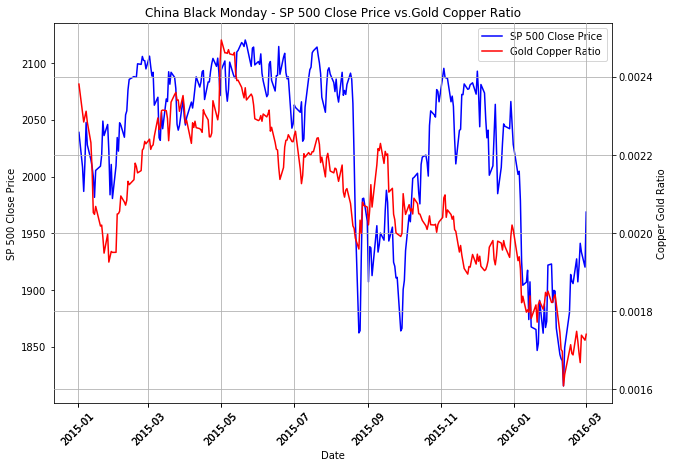

In [117]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_Chinablack_df['Date'], SP500_Chinablack_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_china_df['Date'],copp_gold_china_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("China Black Monday - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

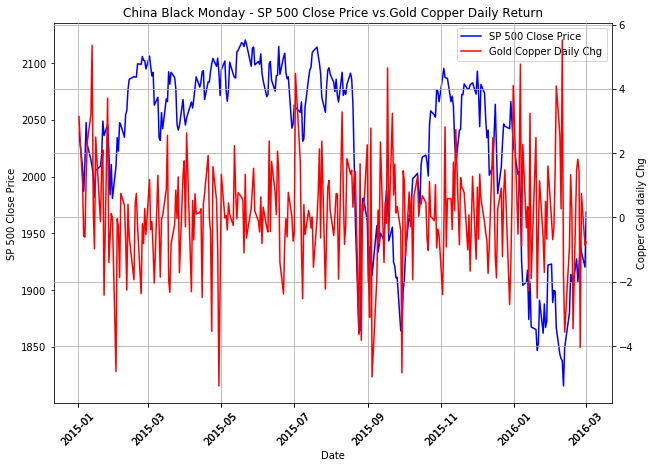

In [118]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_Chinablack_df['Date'], SP500_Chinablack_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_china_df['Date'],copp_gold_china_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("China Black Monday - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

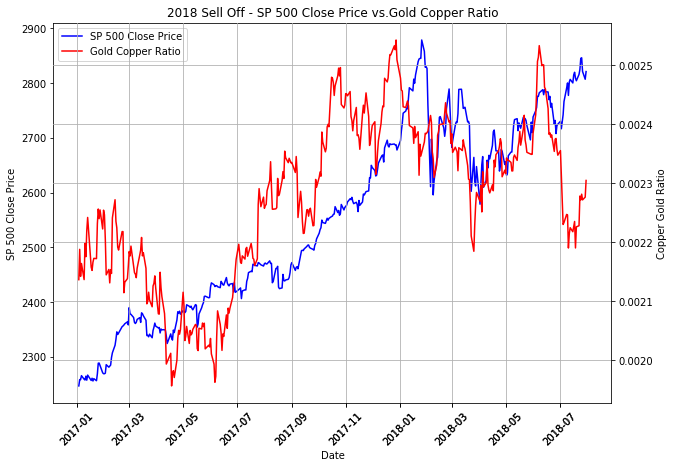

In [119]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_2018_df['Date'], SP500_2018_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_2018_df['Date'],copp_gold_2018_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("2018 Sell Off - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

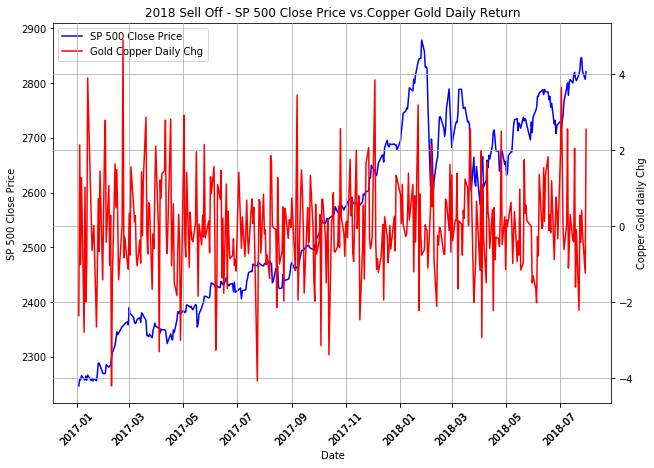

In [120]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_2018_df['Date'], SP500_2018_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_2018_df['Date'],copp_gold_2018_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("2018 Sell Off - SP 500 Close Price vs.Copper Gold Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [121]:
CGr_SP_2018_df = pd.merge(copp_gold_2018_df, SP500_2018_df, on=["Date"])
CGr_SP_2018_corr = st.pearsonr(CGr_SP_2018_df["GoldCopperRatio"],CGr_SP_2018_df["Settle"])[0]
print(CGr_SP_2018_corr)

0.6968316767337307


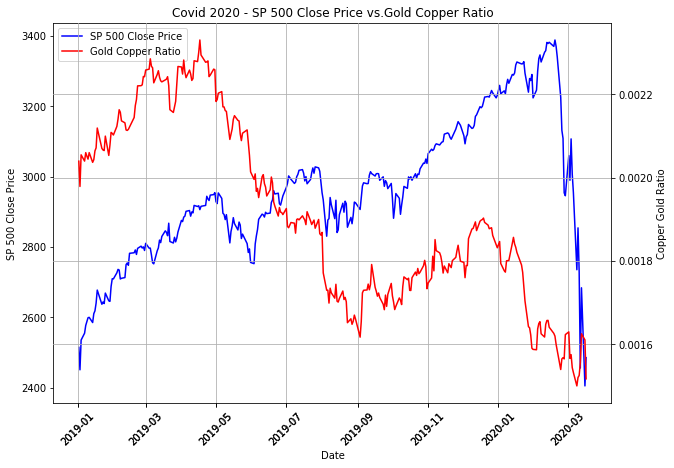

In [122]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_Covid_df['Date'], SP500_Covid_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("Covid 2020 - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [123]:
CGr_SP_Covid_df = pd.merge(copp_gold_covid_df, SP500_Covid_df, on=["Date"])
CGr_SP_Covid_corr = st.
pearsonr(CGr_SP_Covid_df["GoldCopperRatio"],CGr_SP_Covid_df["Settle"])[0]
print(CGr_SP_Covid_corr)

SyntaxError: invalid syntax (<ipython-input-123-496e672c5a41>, line 2)

In [124]:
#copp_gold_covid_df.head()
# Rolling Correlation
Rolling_window = 55
Rolling_correl =55
no_of_std = 2

correl = copp_gold_covid_df['Gold-Copp Dly Ret'].rolling(window=Rolling_window).corr(copp_gold_covid_df['B-5Yr Return'])



KeyError: 'B-5Yr Return'

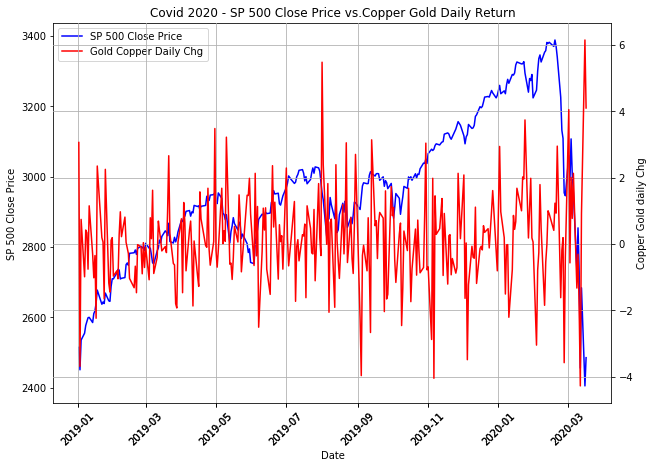

In [125]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_Covid_df['Date'], SP500_Covid_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("Covid 2020 - SP 500 Close Price vs.Copper Gold Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
fig1.savefig("2020 Covid SP500 vs Gold Copper daily ret")
plt.show()

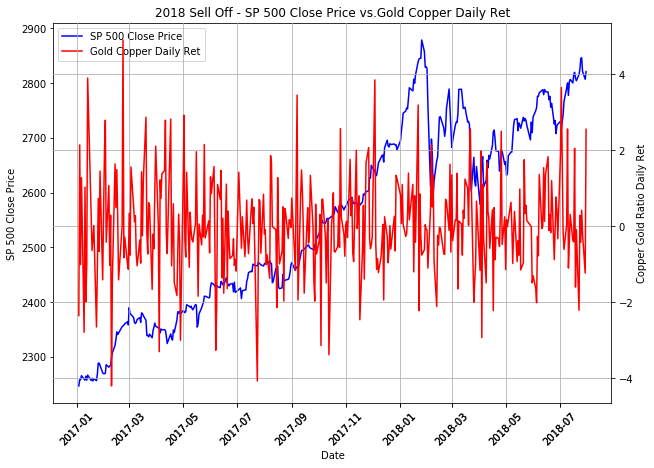

In [126]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_2018_df['Date'], SP500_2018_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_2018_df['Date'],copp_gold_2018_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio Daily Ret")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Ret"), loc=0)
plt.title("2018 Sell Off - SP 500 Close Price vs.Gold Copper Daily Ret")
plt.xlabel("Date")
plt.grid(alpha=1)
fig1.savefig("2018 Sell Off SP500 vs Gold Copper daily ret")
plt.show()

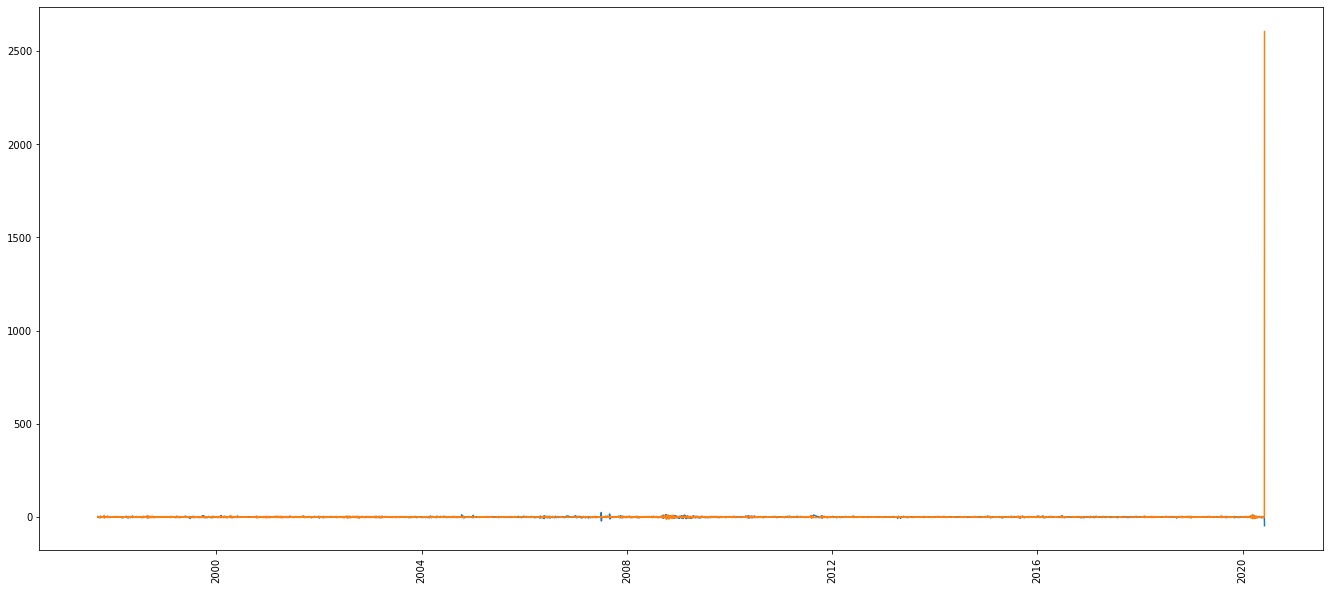

In [127]:
fig = plt.figure(figsize=(23,10))

plt.plot(copp_gold__SP_df['Date'],copp_gold__SP_df['Gold-Copp Dly Ret'])
plt.plot(copp_gold__SP_df['Date'],copp_gold__SP_df['SP Daily Pct Return'])

plt.xlim = (-10,10)
#plt.scatter(copp_gold__SP_df['Date'],copp_gold__SP_df['Copper Price'])

#plt.title("SP 500 daily returns % vs CopperGold Ratio daily change %")
plt.xticks(rotation = 90)
plt.show()

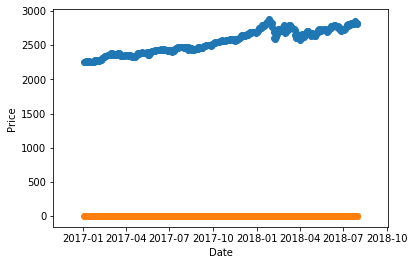

In [128]:
# Plot out rooms versus median house price
plt.scatter(SP500_2018_df['Date'], SP500_2018_df['Settle'])
plt.scatter(copp_gold_2018_df['Date'], copp_gold_2018_df['GoldCopperRatio'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [129]:
#GCr = copp_gold_2018_df['GoldCopperRatio']
#SP500 = SP500_2018_df['Settle']
#copp_gold_df.corr(method ='pearson')
copp_gold_df.head()


,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8679,2020-06-05,-46.70,1683.0,2.5555,0.001518
8678,2020-06-04,-5.09,1727.4,2.4895,0.001441
8677,2020-06-03,1.24,1704.8,2.4875,0.001459
8676,2020-06-02,-1.55,1734.0,2.4910,0.001437
8675,2020-06-01,-1.75,1750.3,2.4705,0.001411


In [130]:
copp_gold_df.corr(method ='pearson')

,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
Gold-Copp Dly Ret,1.000000,-0.007437,0.009951,0.036754
Gold Price,-0.007437,1.000000,0.865657,-0.319177
Copper Price,0.009951,0.865657,1.000000,0.148868
GoldCopperRatio,0.036754,-0.319177,0.148868,1.000000


In [131]:
CGr_SP_Covid_df = pd.merge(copp_gold_covid_df, SP500_Covid_df, on=["Date"])
CGr_SP_Covid_corr = st.pearsonr(CGr_SP_Covid_df["GoldCopperRatio"],CGr_SP_Covid_df["Settle"])[0]
print(CGr_SP_Covid_corr)

-0.488157948095089


In [132]:
CGr_SP_tech_df = pd.merge(copp_gold_tech_df, SPtech_df, on=["Date"])
CGr_SP_tech_corr = st.pearsonr(CGr_SP_tech_df["GoldCopperRatio"],CGr_SP_tech_df["Settle"])[0]
print(CGr_SP_tech_corr)

0.7004921036625438


In [133]:
CGr_SP_87_df = pd.merge(copp_gold_87_df, SP87_df, on=["Date"])
CGr_SP_87_corr = st.pearsonr(CGr_SP_87_df["GoldCopperRatio"],CGr_SP_87_df["Settle"])[0]
print(CGr_SP_87_corr)

ValueError: x and y must have length at least 2.

In [134]:
CGr_SP_LTCM_df = pd.merge(copp_gold_ltcm_df, SPLTCM_df, on=["Date"])
CGr_SP_LTCM_corr = st.pearsonr(CGr_SP_LTCM_df["GoldCopperRatio"],CGr_SP_LTCM_df["Settle"])[0]
print(CGr_SP_LTCM_corr)

-0.5182976190343422


In [135]:
CGr_SP_2018_df = pd.merge(copp_gold_2018_df, SP500_2018_df, on=["Date"])
CGr_SP_2018_corr = st.pearsonr(CGr_SP_2018_df["GoldCopperRatio"],CGr_SP_2018_df["Settle"])[0]
print(CGr_SP_2018_corr)

0.6968316767337307


In [136]:
CGr_SP_FC_df = pd.merge(copp_gold_FC_df, SPFC_df, on=["Date"])
CGr_SP_FC_corr = st.pearsonr(CGr_SP_FC_df["GoldCopperRatio"],CGr_SP_FC_df["Settle"])[0]
print(CGr_SP_FC_corr)

0.8796487015446087


In [137]:
CGr_SP_911 = pd.merge(copp_gold_911_df, SP911_df )
CGr_SP_911_corr = st.pearsonr(CGr_SP_911_df["GoldCopperRatio"],CGr_SP_911_df["Settle"])[0]
print(CGr_SP_911_corr)

NameError: name 'CGr_SP_911_df' is not defined

In [138]:
CGr_SP_2011_12_df = pd.merge(copp_gold_debt_df, SP500_debtc_df, on=["Date"])
CGr_SP_2011_12_corr = st.pearsonr(CGr_SP_2011_12_df["GoldCopperRatio"],CGr_SP_2011_12_df["Settle"])[0]
print(CGr_SP_2011_12_corr)

0.8612211653894124
